## Cargar los datos

Se deben poner todos los descriptores al mismo nivel que todos los archivos de la tarea, en la carpeta `descriptores`

In [1]:
from Data import load_dataset_pair

(queryset1, dataset1) = load_dataset_pair("descriptores/MEL128", 21573, 33545, 128)
print("Q1={} R1={}".format(queryset1.shape, dataset1.shape))

(queryset2, dataset2) = load_dataset_pair("descriptores/SIFT", 2886, 202088, 128)
print("Q2={} R2={}".format(queryset2.shape, dataset2.shape))

(queryset3, dataset3) = load_dataset_pair("descriptores/VGG19", 842, 10171, 4096)
print("Q3={} R3={}".format(queryset3.shape, dataset3.shape))

datasets = [(queryset1, dataset1), (queryset2, dataset2), (queryset3, dataset3)]


Q1=(21573, 128) R1=(33545, 128)
Q2=(2886, 128) R2=(202088, 128)
Q3=(842, 4096) R3=(10171, 4096)


## Calcular Dimensión Intrínseca de los Conjuntos

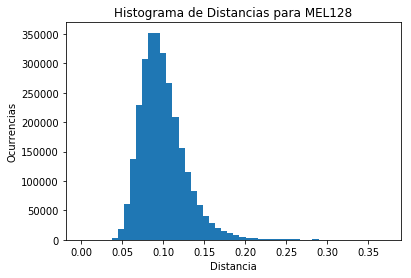

Dimensión Intrínseca MEL128 = 6.336225435950481


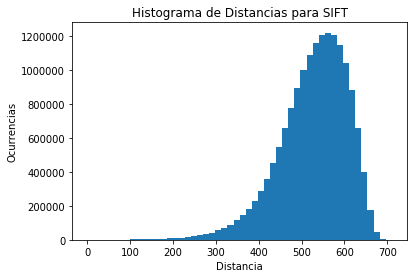

Dimensión Intrínseca SIFT = 21.524372489794803


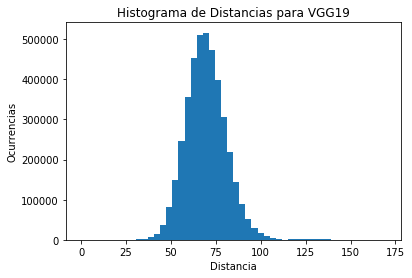

Dimensión Intrínseca VGG19 = 18.79371355769346


In [2]:
from Data import dimension_intrinseca

d1 = dimension_intrinseca(dataset1, titulo='Histograma de Distancias para MEL128', porc_muestras=0.05)
print(f'Dimensión Intrínseca MEL128 = {d1}')

d2 = dimension_intrinseca(dataset2, titulo='Histograma de Distancias para SIFT', porc_muestras=0.02)
print(f'Dimensión Intrínseca SIFT = {d2}')

d3 = dimension_intrinseca(dataset3, titulo='Histograma de Distancias para VGG19', porc_muestras=0.2)
print(f'Dimensión Intrínseca VGG19 = {d3}')


## Medir desempeño de los índices

Se construyen los índices y se prueban distintos parámetros para cada uno, se almacenan los resultados en arreglos por índice.

In [8]:
# imports para hacer las mediciones
from Index import Linear, KDTree, KMeansTree
from Results import obtener_curva

# inicializar arreglos para almacenar curvas
num_datasets = len(datasets)
lscan_dists = [[] for _ in range(num_datasets)]
lscan_time = [[] for _ in range(num_datasets)]

curvas_kdtree = [[] for _ in range(num_datasets)]
leyenda_kdtree = [[] for _ in range(num_datasets)]

curvas_kmeans = [[] for _ in range(num_datasets)]
leyenda_kmeans = [[] for _ in range(num_datasets)]

num_trees = [[] for _ in range(num_datasets)]
num_branches = [[] for _ in range(num_datasets)]


### MEL128

In [11]:
print(f'Usando dataset MEL128')
dataset, queryset = datasets[0]

# construir el indice linear scan y buscar los NN
linear = Linear(dataset)
print("construccion linear scan = {:.1f}".format(linear.build_time))
_, lscan_dists[0], lscan_time[0] = linear.search(queryset)
print("busqueda linear scan = {:.1f}\n".format(lscan_time[0]))


# número de árboles a probar para KD-Tree
num_trees[0] = [5, 10, 20, 30, 40, 60, 80]
for trees in num_trees[0]:

    # construir el indice KD-Tree
    kdtree = KDTree(dataset, trees=trees)
    print('construccion {:d}-KDTree = {:.1f}'.format(trees, kdtree.build_time))

    # obtener curva y agregar al arreglo
    efectividad, eficiencia = obtener_curva(kdtree, queryset, lscan_time[0], lscan_dists[0], verbose=True)
    curvas_kdtree[0].append([efectividad, eficiencia])
    leyenda_kdtree[0].append('{:d} árboles'.format(trees))
    print('{:d} busquedas {:d}-KDTree = {:.1f}\n'.format(len(eficiencia) - 1, trees, sum(eficiencia) * lscan_time[0]))


# número de ramas a probar para K-Means Tree
num_branches[0] = [10, 20, 30, 40, 50, 60]
for branches in num_branches[0]:

    # construir el indice K-Means Tree
    kmeanstree = KMeansTree(dataset, branching=branches)
    print('construccion {:d}-KMeansTree = {:.1f}'.format(branches, kmeanstree.build_time))

    # obtener curva y agregar al arreglo
    efectividad, eficiencia = obtener_curva(kmeanstree, queryset, lscan_time[0], lscan_dists[0], verbose=True)
    curvas_kmeans[0].append([efectividad, eficiencia])
    leyenda_kmeans[0].append('{:d} ramas'.format(branches))
    print('{:d} busquedas {:d}-KMeansTree = {:.1f}\n'.format(len(eficiencia) - 1, branches, sum(eficiencia) * lscan_time[0]))

print('----------------------------\n')


Usando dataset MEL128
construccion linear scan = 0.0
busqueda linear scan = 48.0

construccion 5-KDTree = 0.3
Punto1 = 6.9%, 0.0% (0.1s)
Punto2 = 11.8%, 0.0T (0.1s)
Punto3 = 18.7%, 0.0T (0.1s)
Punto4 = 26.1%, 0.0T (0.2s)
Punto5 = 34.4%, 0.0T (0.3s)
Punto6 = 44.4%, 0.0T (0.5s)
Punto7 = 55.4%, 0.0T (0.8s)
Punto8 = 67.1%, 0.0T (1.5s)
Punto9 = 78.2%, 0.1T (3.0s)
Punto10 = 87.5%, 0.1T (5.7s)
Punto11 = 94.3%, 0.2T (11.3s)
Punto12 = 98.1%, 0.5T (23.6s)
Punto13 = 99.6%, 1.1T (51.3s)
Punto14 = 99.9%, 2.5T (117.6s)
13 busquedas 5-KDTree = 216.3

construccion 10-KDTree = 0.6
Punto1 = 6.8%, 0.0% (0.2s)
Punto2 = 11.7%, 0.0T (0.2s)
Punto3 = 18.7%, 0.0T (0.2s)
Punto4 = 27.7%, 0.0T (0.3s)
Punto5 = 37.1%, 0.0T (0.4s)
Punto6 = 48.0%, 0.0T (0.6s)
Punto7 = 59.5%, 0.0T (1.0s)
Punto8 = 71.6%, 0.0T (1.9s)
Punto9 = 82.4%, 0.1T (3.5s)
Punto10 = 90.9%, 0.1T (6.8s)
Punto11 = 96.2%, 0.3T (13.7s)
Punto12 = 98.8%, 0.6T (28.0s)
Punto13 = 99.8%, 1.4T (65.0s)
Punto14 = 100.0%, 3.3T (156.8s)
13 busquedas 10-KDTree = 27

### SIFT

In [ ]:
print(f'Usando dataset SIFT')
dataset, queryset = datasets[1]


# construir el indice linear scan y buscar los NN
linear = Linear(dataset)
print("construccion linear scan = {:.1f}".format(linear.build_time))
_, lscan_dists[1], lscan_time[1] = linear.search(queryset)
print("busqueda linear scan = {:.1f}\n".format(lscan_time[1]))


# número de árboles a probar para KD-Tree
num_trees[1] = [2, 5, 10, 20, 40, 60]
for trees in num_trees[1]:

    # construir el indice KD-Tree
    kdtree = KDTree(dataset, trees=trees)
    print('construccion {:d}-KDTree = {:.1f}'.format(trees, kdtree.build_time))

    # obtener curva y agregar al arreglo
    efectividad, eficiencia = obtener_curva(kdtree, queryset, lscan_time[1], lscan_dists[1], verbose=True)
    curvas_kdtree[1].append([efectividad, eficiencia])
    leyenda_kdtree[1].append('{:d} árboles'.format(trees))
    print('{:d} busquedas {:d}-KDTree = {:.1f}\n'.format(len(eficiencia) - 1, trees, sum(eficiencia) * lscan_time[1]))


# número de ramas a probar para K-Means Tree
num_branches[1] = [5, 10, 20, 30, 50]
for branches in num_branches[1]:

    # construir el indice K-Means Tree
    kmeanstree = KMeansTree(dataset, branching=branches)
    print('construccion {:d}-KMeansTree = {:.1f}'.format(branches, kmeanstree.build_time))

    # obtener curva y agregar al arreglo
    efectividad, eficiencia = obtener_curva(kmeanstree, queryset, lscan_time[1], lscan_dists[1], verbose=True)
    curvas_kmeans[1].append([efectividad, eficiencia])
    leyenda_kmeans[1].append('{:d} ramas'.format(branches))
    print('{:d} busquedas {:d}-KMeansTree = {:.1f}\n'.format(len(eficiencia) - 1, branches, sum(eficiencia) * lscan_time[1]))

print('----------------------------\n')


Usando dataset SIFT
construccion linear scan = 0.0
busqueda linear scan = 37.2

construccion 2-KDTree = 0.0
Punto1 = 10.7%, 0.0% (0.2s)
Punto2 = 19.1%, 0.0T (0.3s)
Punto3 = 29.7%, 0.0T (0.4s)
Punto4 = 41.4%, 0.0T (0.6s)
Punto5 = 54.2%, 0.0T (0.9s)
Punto6 = 66.8%, 0.0T (1.5s)
Punto7 = 77.8%, 0.1T (2.8s)
Punto8 = 86.8%, 0.1T (5.4s)
Punto9 = 93.6%, 0.3T (10.3s)
Punto10 = 97.7%, 0.5T (20.4s)
Punto11 = 99.6%, 1.1T (40.7s)
Punto12 = 100.0%, 2.5T (91.6s)
11 busquedas 2-KDTree = 175.1

construccion 5-KDTree = 0.0
Punto1 = 11.0%, 0.0% (0.5s)
Punto2 = 19.6%, 0.0T (0.6s)
Punto3 = 32.1%, 0.0T (0.6s)
Punto4 = 46.9%, 0.0T (0.8s)
Punto5 = 60.9%, 0.0T (1.3s)
Punto6 = 74.4%, 0.1T (2.0s)
Punto7 = 85.6%, 0.1T (3.7s)
Punto8 = 93.0%, 0.2T (6.9s)
Punto9 = 97.2%, 0.4T (13.1s)
Punto10 = 99.2%, 0.8T (28.1s)
Punto11 = 99.9%, 1.5T (54.4s)
Punto12 = 100.0%, 3.6T (135.4s)
11 busquedas 5-KDTree = 247.4

construccion 10-KDTree = 0.1
Punto1 = 11.0%, 0.0% (0.8s)
Punto2 = 18.9%, 0.0T (0.9s)
Punto3 = 32.1%, 0.0T (0.9s)


### VGG19

In [ ]:
print(f'Usando dataset VGG19')
dataset, queryset = datasets[2]


# construir el indice linear scan y buscar los NN
linear = Linear(dataset)
print("construccion linear scan = {:.1f}".format(linear.build_time))

_, lscan_dists[2], lscan_time[2] = linear.search(queryset)
print("busqueda linear scan = {:.1f}\n".format(lscan_time[2]))


# número de árboles a probar para KD-Tree
num_trees[2] = [20, 30, 40, 60, 80]
for trees in num_trees[2]:

    # construir el indice KD-Tree
    kdtree = KDTree(dataset, trees=trees)
    print('construccion {:d}-KDTree = {:.1f}'.format(trees, kdtree.build_time))

    # obtener curva y agregar al arreglo
    efectividad, eficiencia = obtener_curva(kdtree, queryset, lscan_time[2], lscan_dists[2], verbose=True)
    curvas_kdtree[2].append([efectividad, eficiencia])
    leyenda_kdtree[2].append('{:d} árboles'.format(trees))
    
    print('{:d} busquedas {:d}-KDTree = {:.1f}\n'.format(len(eficiencia) - 1, trees, sum(eficiencia) * lscan_time[2]))


# número de ramas a probar para K-Means Tree
num_branches[2] = [30, 50, 60, 70, 90]
for branches in num_branches[2]:

    # construir el indice K-Means Tree
    kmeanstree = KMeansTree(dataset, branching=branches)
    print('construccion {:d}-KMeansTree = {:.1f}'.format(branches, kmeanstree.build_time))

    # obtener curva y agregar al arreglo
    efectividad, eficiencia = obtener_curva(kmeanstree, queryset, lscan_time[2], lscan_dists[2], verbose=True)
    curvas_kmeans[2].append([efectividad, eficiencia])
    leyenda_kmeans[2].append('{:d} ramas'.format(branches))
    
    print('{:d} busquedas {:d}-KMeansTree = {:.1f}\n'.format(len(eficiencia) - 1, branches, sum(eficiencia) * lscan_time[2]))

print('----------------------------\n')


## Graficar y Tabular los resultados

In [ ]:
from Results import graficar_curvas

# graficar los datos
print('Hacer doble click sobre la imagen para ver en definición completa')

graficar_curvas(curvas_kdtree[0], leyenda_kdtree[0], "KD-Tree en MEL128")
graficar_curvas(curvas_kmeans[0], leyenda_kmeans[0], "K-Means Tree en MEL128")

graficar_curvas(curvas_kdtree[1], leyenda_kdtree[1], "KD-Tree en SIFT")
graficar_curvas(curvas_kmeans[1], leyenda_kmeans[1], "K-Means Tree en SIFT")

graficar_curvas(curvas_kdtree[2], leyenda_kdtree[2], "KD-Tree en VGG19")
graficar_curvas(curvas_kmeans[2], leyenda_kmeans[2], "K-Means Tree en VGG19")


### Obtener mejor curva para cada conjunto

In [ ]:
from Data import mejor_curva


mejor_kdtree = [0 for _ in range(num_datasets)]
for i in range(num_datasets):
    mejor_kdtree[i] = mejor_curva(curvas_kdtree[i])

print(f'mejor KD-Tree para MEL128: {leyenda_kdtree[0][mejor_kdtree[0]]}')
print(f'mejor KD-Tree para SIFT: {leyenda_kdtree[1][mejor_kdtree[1]]}')
print(f'mejor KD-Tree para VGG19: {leyenda_kdtree[2][mejor_kdtree[2]]}\n')

mejor_kmeans = [0 for _ in range(num_datasets)]
for i in range(num_datasets):
    mejor_kmeans[i] = mejor_curva(curvas_kmeans[i])

print(f'mejor K-Means Tree para MEL128: {leyenda_kmeans[0][mejor_kmeans[0]]}')
print(f'mejor K-Means Tree para SIFT: {leyenda_kmeans[1][mejor_kmeans[1]]}')
print(f'mejor K-Means Tree para VGG19: {leyenda_kmeans[2][mejor_kmeans[2]]}\n')


## Medir rendimiento de mejor índice usando PCA

se usaran 3 datasets con PCA además del original, distribuídos uniformemente sobre las posibilidades

#### Desde este punto en adelante no se alcanzó a probar la ejecución por tiempo, pero la lógica debería estar correcta para obtener los resultados usando PCA y graficarlos.


### MEL128

In [ ]:
from Results import obtener_curva_nn

curvas_kdtree_2 = [[] for _ in range(num_datasets)]
leyenda_kdtree_2 = [[] for _ in range(num_datasets)]
curvas_kmeans_2 = [[] for _ in range(num_datasets)]
leyenda_kmeans_2 = [[] for _ in range(num_datasets)]

i = 0
conjuntos = [("PCA-64dim-96.5var", 64), ("PCA-16dim-70.5var", 16), ("PCA-4dim-36.1var", 4)]

# obtener vecinos cercanos
linear = Linear(datasets[i][1])

# se obtiene una lista de vecinos cercanos para cada punto, permitiendo chequear 
# correctitud cuando hay más de un vecino a la misma distancia
nn, _ = linear.all_nn(datasets[i][0])

# curva original kdtree
curvas_kdtree_2[i].append(curvas_kdtree[i][mejor_kdtree[i]])
leyenda_kdtree_2[i].append(leyenda_kdtree[i][mejor_kdtree[i]])

# curva original kmeans
curvas_kmeans_2[i].append(curvas_kmeans[i][mejor_kmeans[i]])
leyenda_kmeans_2[i].append(leyenda_kmeans[i][mejor_kmeans[i]])

for nombre, dim in conjuntos:
    (queryset, dataset) = load_dataset_pair(f'descriptores/MEL128/{nombre}', 21573, 33545, dim)

    # construir el indice KD-Tree
    kdtree = KDTree(dataset, trees=num_trees[i][mejor_kdtree[i]])
    print('construccion KDTree con {:s} = {:.1f}'.format(nombre, kdtree.build_time))

    # obtener curva y agregar al arreglo
    efectividad, eficiencia = obtener_curva_nn(kdtree, queryset, lscan_time[i], nn, verbose=True)
    curvas_kdtree_2[i].append([efectividad, eficiencia])
    leyenda_kdtree_2[i].append(nombre)

    # construir el indice K-Means Tree    
    kmeanstree = KMeansTree(dataset, branching=num_branches[i][mejor_kmeans[i]])
    print('construccion KMeansTree con {:s} = {:.1f}'.format(nombre, kmeanstree.build_time))

    # obtener curva y agregar al arreglo
    efectividad, eficiencia = obtener_curva_nn(kmeanstree, queryset, lscan_time[i], nn, verbose=True)
    curvas_kmeans_2[i].append([efectividad, eficiencia])
    leyenda_kmeans_2[i].append(nombre)


### SIFT

In [ ]:
i = 1
conjuntos = [("PCA-64dim-94.3var", 64), ("PCA-16dim-69.8var", 16), ("PCA-4dim-41.6var", 4)]

# obtener vecinos cercanos
linear = Linear(datasets[i][1])

# se obtiene una lista de vecinos cercanos para cada punto, permitiendo chequear 
# correctitud cuando hay más de un vecino a la misma distancia
nn, _ = linear.all_nn(datasets[i][0])

# curva original kdtree
curvas_kdtree_2[i].append(curvas_kdtree[i][mejor_kdtree[i]])
leyenda_kdtree_2[i].append(leyenda_kdtree[i][mejor_kdtree[i]])

# curva original kmeans
curvas_kmeans_2[i].append(curvas_kmeans[i][mejor_kmeans[i]])
leyenda_kmeans_2[i].append(leyenda_kmeans[i][mejor_kmeans[i]])

for nombre, dim in conjuntos:
    (queryset, dataset) = load_dataset_pair(f'descriptores/SIFT/{nombre}', 21573, 33545, dim)

    # construir el indice KD-Tree
    kdtree = KDTree(dataset, trees=num_trees[i][mejor_kdtree[i]])
    print('construccion KDTree con {:s} = {:.1f}'.format(nombre, kdtree.build_time))

    # obtener curva y agregar al arreglo
    efectividad, eficiencia = obtener_curva_nn(kdtree, queryset, lscan_time[i], nn, verbose=True)
    curvas_kdtree_2[i].append([efectividad, eficiencia])
    leyenda_kdtree_2[i].append(nombre)

    # construir el indice K-Means Tree    
    kmeanstree = KMeansTree(dataset, branching=num_branches[i][mejor_kmeans[i]])
    print('construccion KMeansTree con {:s} = {:.1f}'.format(nombre, kmeanstree.build_time))

    # obtener curva y agregar al arreglo
    efectividad, eficiencia = obtener_curva_nn(kmeanstree, queryset, lscan_time[i], nn, verbose=True)
    curvas_kmeans_2[i].append([efectividad, eficiencia])
    leyenda_kmeans_2[i].append(nombre)


### VGG19

In [ ]:
i = 2
conjuntos = [("PCA-1024dim-94.2var", 1024), ("PCA-128dim-76var", 128), ("PCA-16dim-40.9var", 16)]

# obtener vecinos cercanos
linear = Linear(datasets[i][1])

# se obtiene una lista de vecinos cercanos para cada punto, permitiendo chequear 
# correctitud cuando hay más de un vecino a la misma distancia
nn, _ = linear.all_nn(datasets[i][0])

# curva original kdtree
curvas_kdtree_2[i].append(curvas_kdtree[i][mejor_kdtree[i]])
leyenda_kdtree_2[i].append(leyenda_kdtree[i][mejor_kdtree[i]])

# curva original kmeans
curvas_kmeans_2[i].append(curvas_kmeans[i][mejor_kmeans[i]])
leyenda_kmeans_2[i].append(leyenda_kmeans[i][mejor_kmeans[i]])

for nombre, dim in conjuntos:
    (queryset, dataset) = load_dataset_pair(f'descriptores/VGG19/{nombre}', 21573, 33545, dim)

    # construir el indice KD-Tree
    kdtree = KDTree(dataset, trees=num_trees[i][mejor_kdtree[i]])
    print('construccion KDTree con {:s} = {:.1f}'.format(nombre, kdtree.build_time))

    # obtener curva y agregar al arreglo
    efectividad, eficiencia = obtener_curva_nn(kdtree, queryset, lscan_time[i], nn, verbose=True)
    curvas_kdtree_2[i].append([efectividad, eficiencia])
    leyenda_kdtree_2[i].append(nombre)

    # construir el indice K-Means Tree    
    kmeanstree = KMeansTree(dataset, branching=num_branches[i][mejor_kmeans[i]])
    print('construccion KMeansTree con {:s} = {:.1f}'.format(nombre, kmeanstree.build_time))

    # obtener curva y agregar al arreglo
    efectividad, eficiencia = obtener_curva_nn(kmeanstree, queryset, lscan_time[i], nn, verbose=True)
    curvas_kmeans_2[i].append([efectividad, eficiencia])
    leyenda_kmeans_2[i].append(nombre)


## Graficar y Tabular resultados PCA

In [ ]:
print('Hacer doble click sobre la imagen para ver en definición completa')

graficar_curvas(curvas_kdtree_2[0], leyenda_kdtree_2[0], "KD-Tree con PCA en MEL128")
graficar_curvas(curvas_kmeans_2[0], leyenda_kmeans_2[0], "K-Means Tree con PCA en MEL128")

graficar_curvas(curvas_kdtree_2[1], leyenda_kdtree_2[1], "KD-Tree con PCA en SIFT")
graficar_curvas(curvas_kmeans_2[1], leyenda_kmeans_2[1], "K-Means Tree con PCA en SIFT")

graficar_curvas(curvas_kdtree_2[2], leyenda_kdtree_2[2], "KD-Tree con PCA en VGG19")
graficar_curvas(curvas_kmeans_2[2], leyenda_kmeans_2[2], "K-Means Tree con PCA en VGG19")


# Análisis

a) En general, los KD-Tree obtuvieron una mejor performance que los K-Means Tree, y no se logró obtener gran diferencia entre las curvas con los valores de árboles probados, como trabajo a futuro se deberían probar más valores para encontrar una tendencia clara. 

Una observación importante es que los K-Means Tree obtuvieron en la mayoría de los casos una mejor eficiencia al acercarse a una efectividad del 100%, mientras que en el KD-Tree la efectividad cercana al 100% tomaba hasta 4 veces más que la busqueda lineal. Esto nos indica que si se quiere un sistema con alta efectividad en las busquedas, se puede reducir el tiempo utilizando K-Means Tree.

No se logró detectar un criterio para elegir el número de ramas en K-Means Tree o árboles en KD-Trees, pero sí se puede afirmar que con muchas dimensiones el desempeño de K-Means empeora notablemente en casi toda la curva (caso de dataset VGG19 con >4000 dimensiones).

b)

c)